Demonstrate a really basic binomial model

In [5]:
stan_code = """
data {
  // the data block tells Stan what data we will pass it from python
  int<lower=0> N; // tell
  int<lower=0,upper=1> y[N];
}

parameters {
  // the paramaters block defines the parameters in the statistical model
  // in Stan, all variables should be either data or parameters (or derived from one or the other)
  // Stan attempts to draw samples from the posterior of the parameters
  real<lower=0,upper=1> theta;
}

model {
  // the model block is the meat of the statistical model
  // the model block should define your prior and your likelihood
  theta ~ beta(1,1);
  y ~ bernoulli(theta);
}
"""

/Users/douglasjohnson/anaconda/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/douglasjohnson/anaconda/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/douglasjohnson/anaconda/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/Users/douglasjohnson/anaconda/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pic

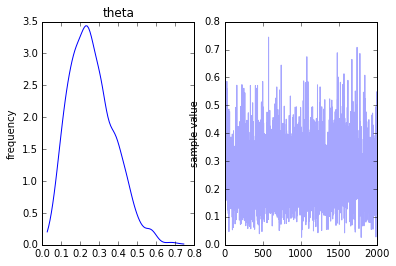

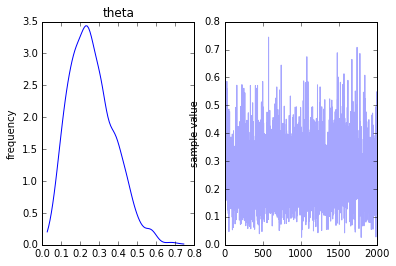

In [15]:
% matplotlib inline
import pystan

# set the data in python
N = 10
y = [0,1,0,0,0,0,0,0,0,1]
stan_data = {'N': N, 'y': y}

# pass the data to the model and run the model
fit = pystan.stan(model_code=stan_code, data=stan_data, iter=1000, chains=4)

# graph the output
fit.traceplot()

In [14]:
# look at the samples
temp = fit.extract()['theta']
sum(temp>.5)/len(temp)

0.034500000000000003

In [13]:
fit.extract()

OrderedDict([('theta',
              array([ 0.28831522,  0.19192538,  0.52856294, ...,  0.09505357,
                      0.33657118,  0.1353677 ])),
             ('lp__',
              array([-6.79218435, -6.86985375, -8.68050727, ..., -7.95885974,
                     -6.95984027, -7.30834002]))])